In [1]:
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

/home/dcoates/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
import makeAmoebasX
import amoeba2Dxx
import amoebaSegments2x
import draw_matplotlib
import render

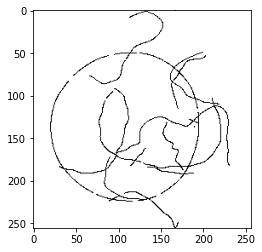

In [3]:
# Defaults are given in amoeba_struct (like in Matlab). Image with target:
amoeba_struct = makeAmoebasX.AmoebaStruct(1,'large') 

# A single temporary buf. to reuse for all images
buf = np.zeros((amoeba_struct.image_rect_size, amoeba_struct.image_rect_size), dtype=np.uint8)

# Set these as desired:
which_target=101
which_clutter=100

# Generate and render (255 for segs, 0 for background)
[s,xs,ys]=amoeba2Dxx.amoeba2Dxx( amoeba_struct, which_target, which_clutter )
img=render.render_amoeba(buf, xs,ys)

#Draw (invert for white on black)
plt.imshow(255-img, cmap='bone')

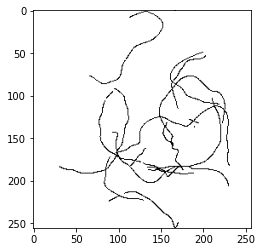

In [4]:
# Non-target image. Has 4 distractors and no target.
amoeba_struct = makeAmoebasX.AmoebaStruct(0,'large') 

which_clutter=100
[s,xs,ys]=amoeba2Dxx.amoeba2Dxx( amoeba_struct, -1, which_clutter )
img=render.render_amoeba(buf, xs,ys)
plt.imshow(255-img, cmap='bone')

In [29]:
# Make 100 targets:
amoeba_struct = makeAmoebasX.AmoebaStruct(1,'large') 
imgs_targets = np.zeros( (100,amoeba_struct.image_rect_size,amoeba_struct.image_rect_size))
for n in np.arange(100):
    [s,xs,ys]=amoeba2Dxx.amoeba2Dxx( amoeba_struct, n, n )
    imgs_targets[n]=render.render_amoeba(buf, xs,ys)

In [30]:
# Make 100 non-targets:
amoeba_struct = makeAmoebasX.AmoebaStruct(0,'large') 
imgs_nontargets = np.zeros( (100,amoeba_struct.image_rect_size,amoeba_struct.image_rect_size))
for n in np.arange(100):
    [s,xs,ys]=amoeba2Dxx.amoeba2Dxx( amoeba_struct, -1, 10000+n ) # Offset so no clutter repeated within target imgs
    imgs_nontargets[n]=render.render_amoeba(buf, xs,ys)

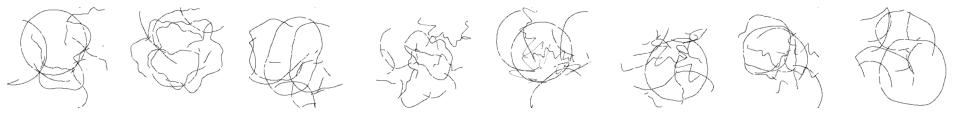

In [40]:
plt.figure(figsize=(17,3))
for n in np.arange(8):
    plt.subplot(1,8,n+1)
    plt.imshow( 255-imgs_targets[n], cmap='bone')
    plt.axis('off')

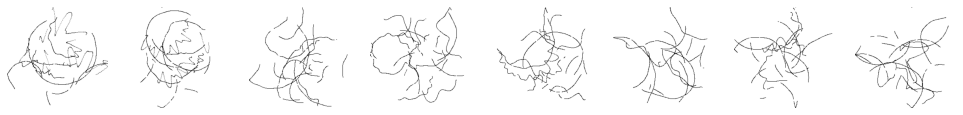

In [41]:
plt.figure(figsize=(17,3))
for n in np.arange(8):
    plt.subplot(1,8,n+1)
    plt.imshow( 255-imgs_nontargets[n], cmap='bone')
    plt.axis('off')